<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/Analys_Data_Lele/blob/main/Model%20LSTM%20Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libraries yang diperlukan
!pip install pandas numpy matplotlib seaborn tensorflow scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# URL dataset
url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'

# Membaca dataset
df = pd.read_csv(url, sep=';')
print(df.head(100))  # Menampilkan 100 baris pertama



    Id    Provinsi Kabupaten/Kota Jenis Ikan  Tahun  Volume Produksi  \
0  NaN  JAWA BARAT        BANDUNG       LELE   2019          5372785   
1  NaN  JAWA BARAT  BANDUNG BARAT       LELE   2019          1328082   
2  NaN  JAWA BARAT         BEKASI       LELE   2019          2019121   
3  NaN  JAWA BARAT          BOGOR       LELE   2019         89814340   
4  NaN  JAWA BARAT         CIAMIS       LELE   2019         18162827   
..  ..         ...            ...        ...    ...              ...   
95 NaN  JAWA TIMUR      SITUBONDO       LELE   2019           185865   
96 NaN  JAWA TIMUR        SUMENEP       LELE   2019           170428   
97 NaN  JAWA TIMUR     TRENGGALEK       LELE   2019          4053426   
98 NaN  JAWA TIMUR          TUBAN       LELE   2019          2010670   
99 NaN  JAWA TIMUR    TULUNGAGUNG       LELE   2019         10006869   

    Nilai Produksi   Harga Lele  
0      85964560000  16000.00000  
1      19921230000  15000.00000  
2      34325057000  17000.00000  

   Id    Provinsi Kabupaten/Kota Jenis Ikan  Tahun  Volume Produksi  \
0 NaN  JAWA BARAT        BANDUNG       LELE   2019          5372785   
1 NaN  JAWA BARAT  BANDUNG BARAT       LELE   2019          1328082   
2 NaN  JAWA BARAT         BEKASI       LELE   2019          2019121   
3 NaN  JAWA BARAT          BOGOR       LELE   2019         89814340   
4 NaN  JAWA BARAT         CIAMIS       LELE   2019         18162827   

   Nilai Produksi  Harga Lele  
0     85964560000     16000.0  
1     19921230000     15000.0  
2     34325057000     17000.0  
3   1526843780000     17000.0  
4    236116751000     13000.0  

Matriks Korelasi:
                 Id     Tahun  Volume Produksi  Nilai Produksi  Harga Lele
Id              NaN       NaN              NaN             NaN         NaN
Tahun           NaN  1.000000         0.027384        0.054038    0.387378
Volume Produksi NaN  0.027384         1.000000        0.985062    0.081105
Nilai Produksi  NaN  0.054038         0.985062        1.000000

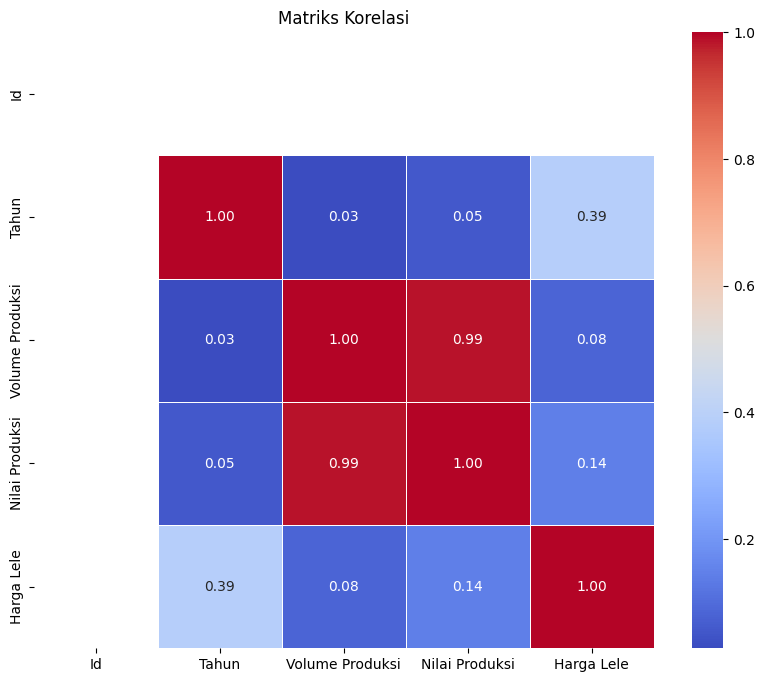

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset dari URL GitHub
url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'
data = pd.read_csv(url, delimiter=';')

# Menampilkan beberapa baris pertama dari dataset untuk inspeksi
print(data.head())

# Memilih hanya kolom numerik untuk perhitungan korelasi
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi antar variabel numerik
correlation_matrix = numeric_data.corr()

# Menampilkan korelasi
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Asumsikan dataset Anda bernama 'data'
# Pertama, kita akan memisahkan fitur dan target (Harga Lele)
X = data[['Tahun', 'Volume Produksi', 'Nilai Produksi']]  # Fitur
y = data['Harga Lele']  # Target

# Membagi data menjadi training dan testing sets terlebih dahulu (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Membagi sisa data (X_temp dan y_temp) menjadi validation dan test sets (75% validation, 25% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=False)

# Menampilkan jumlah record di masing-masing set
print(f'Training set: {X_train.shape[0]} records')
print(f'Validation set: {X_val.shape[0]} records')
print(f'Test set: {X_test.shape[0]} records')


Training set: 400 records
Validation set: 75 records
Test set: 25 records


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# URL dataset
url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'

# Membaca dataset
df = pd.read_csv(url, sep=';')
# Memastikan tipe data yang benar
df['Tahun'] = df['Tahun'].astype(str)

# One-Hot Encoding untuk kolom 'Kabupaten/Kota' dan 'Provinsi'
df_encoded = pd.get_dummies(df, columns=['Kabupaten/Kota', 'Provinsi'])

# Fitur yang akan digunakan
features = ['Volume Produksi', 'Nilai Produksi', 'Harga Lele'] + [col for col in df_encoded.columns if 'Kabupaten/Kota' in col or 'Provinsi' in col]

# Menyiapkan data input dan target
X = df_encoded[features].values
y = df_encoded['Harga Lele'].values  # Target: Harga Lele

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Mengubah data menjadi bentuk yang sesuai untuk LSTM (samples, time_steps, features)
X_train_3d = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_3d = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train_3d, y_train, epochs=60, batch_size=32, validation_data=(X_test_3d, y_test))

# Evaluasi model
loss = model.evaluate(X_test_3d, y_test)
print(f'Loss pada data uji: {loss}')

# Prediksi harga lele ke depan
predictions = model.predict(X_test_3d)

# Evaluasi hasil prediksi dengan metrik yang lebih lengkap
r2_lstm = r2_score(y_test, predictions)
mse_lstm = mean_squared_error(y_test, predictions)
mae_lstm = mean_absolute_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)

# Menampilkan hasil evaluasi
print(f'R-squared LSTM: {r2_lstm}')
print(f'MSE LSTM: {mse_lstm}')
print(f'MAE LSTM: {mae_lstm}')
print(f'RMSE LSTM: {rmse_lstm}')


Epoch 1/60
13/13 [==============================] - 1s 21ms/step - loss: 0.0935 - val_loss: 0.0718
Epoch 2/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0612 - val_loss: 0.0459
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0361 - val_loss: 0.0277
Epoch 4/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0172
Epoch 5/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0133
Epoch 6/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0120
Epoch 7/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0112
Epoch 8/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0105
Epoch 9/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0100
Epoch 10/60
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0096
Epoch 11/60
13/13 

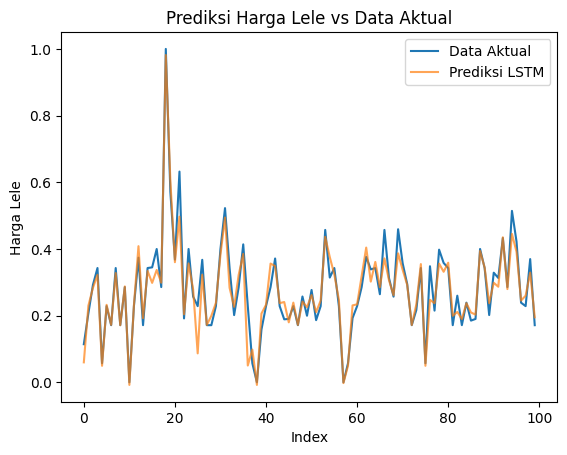

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Data Aktual')
plt.plot(predictions, label='Prediksi LSTM', alpha=0.7)
plt.title('Prediksi Harga Lele vs Data Aktual')
plt.xlabel('Index')
plt.ylabel('Harga Lele')
plt.legend()
plt.show()


In [19]:
import numpy as np
import pandas as pd

# Fungsi untuk melakukan prediksi berurutan (recursive prediction)
def predict_future(model, last_known_data, n_years, scaler, input_shape):
    predictions = []
    current_input = last_known_data

    # Lakukan prediksi untuk n_years ke depan
    for _ in range(n_years * 12):  # Prediksi bulanan selama 4 tahun (4 tahun * 12 bulan)
        # Prediksi harga lele untuk bulan berikutnya
        pred = model.predict(current_input.reshape(1, 1, current_input.shape[1]))  # Sesuaikan bentuk input
        predictions.append(pred[0][0])  # Ambil prediksi pertama

        # Update input untuk bulan berikutnya
        current_input = np.roll(current_input, -1, axis=1)  # Geser data input untuk prediksi berikutnya
        current_input[0, -1] = pred  # Masukkan prediksi sebagai input baru

    # Kembalikan hasil prediksi yang ter-reshape
    return np.array(predictions)

# Ambil data terakhir untuk prediksi (data uji atau data terakhir dari dataset)
last_known_data = X_test_3d[-1]  # Gunakan data terakhir dari X_test

# Tentukan jumlah tahun yang ingin diprediksi (misalnya 4 tahun)
n_years = 1

# Lakukan prediksi untuk 4 tahun ke depan
future_predictions = predict_future(model, last_known_data, n_years, scaler, X_train_3d.shape)

# Skala kembali prediksi ke harga lele asli
future_predictions_rescaled = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Tampilkan hasil prediksi untuk 4 tahun ke depan
print("Prediksi harga lele 12 bulan ke depan:")
print(future_predictions_rescaled)


1/1 [==============================] - 0s 24ms/step


<ipython-input-19-f5a731341b05>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1] = pred  # Masukkan prediksi sebagai input baru


1/1 [==============================] - 0s 25ms/step
Prediksi harga lele 12 bulan ke depan:
[[15415.052]
 [12581.908]
 [14028.336]
 [13369.811]
 [13355.699]
 [13920.865]
 [13056.229]
 [13744.003]
 [11854.629]
 [14582.467]
 [13684.24 ]
 [13917.49 ]]


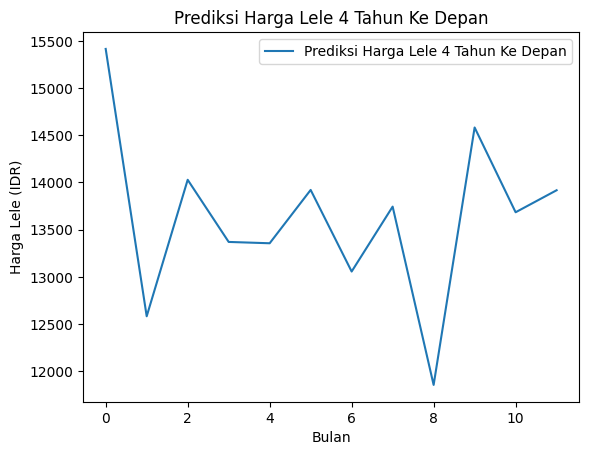

In [20]:
import matplotlib.pyplot as plt

# Membuat grafik prediksi harga lele untuk 4 tahun ke depan
plt.plot(future_predictions_rescaled, label='Prediksi Harga Lele 4 Tahun Ke Depan')
plt.title('Prediksi Harga Lele 4 Tahun Ke Depan')
plt.xlabel('Bulan')
plt.ylabel('Harga Lele (IDR)')
plt.legend()
plt.show()


In [21]:
# Mengembalikan prediksi ke skala asli
predicted_prices = scaler.inverse_transform(predictions)
print(predicted_prices)


[[13048.623]
 [16022.586]
 [16958.918]
 [17646.76 ]
 [12866.626]
 [16067.658]
 [15015.098]
 [17736.803]
 [14998.584]
 [17033.469]
 [11863.709]
 [16048.628]
 [19147.428]
 [15367.747]
 [17846.303]
 [17220.219]
 [17899.191]
 [17229.1  ]
 [29181.588]
 [22590.875]
 [18306.145]
 [20697.508]
 [15570.237]
 [18241.709]
 [16880.855]
 [13519.773]
 [17644.84 ]
 [15011.53 ]
 [15493.294]
 [16175.035]
 [18697.53 ]
 [20651.719]
 [16963.299]
 [15960.394]
 [17646.37 ]
 [18739.617]
 [12883.174]
 [13719.138]
 [11863.799]
 [15610.056]
 [16069.98 ]
 [18234.37 ]
 [18105.361]
 [16157.494]
 [16214.998]
 [15148.562]
 [16184.427]
 [15011.075]
 [16239.912]
 [15945.457]
 [16581.322]
 [15682.603]
 [16291.723]
 [19638.654]
 [18577.879]
 [17661.21 ]
 [16330.231]
 [11960.807]
 [12869.113]
 [16037.504]
 [16095.741]
 [17576.613]
 [19073.379]
 [17286.432]
 [18321.041]
 [16992.225]
 [18505.742]
 [17357.727]
 [16572.809]
 [18772.277]
 [17905.713]
 [17112.418]
 [15008.243]
 [16088.565]
 [18207.584]
 [12867.008]
 [16329.809]

In [22]:
!pip install scikit-learn joblib

# ----> Menyimpan scaler <----
import joblib  # Import the joblib module
joblib.dump(scaler, 'lele_scaler.pkl')

['lele_scaler.pkl']

In [23]:
import joblib

# Memuat scaler
loaded_scaler = joblib.load('lele_scaler.pkl')

# ... (Gunakan loaded_scaler untuk scaling data baru atau inverse transform) ...

In [24]:
from tensorflow.keras.models import load_model, save_model

# Path to save the model
model_path = 'lele_price_prediction_model.h5'

# Save the model
save_model(model, model_path, save_format='h5')

# Load the model
loaded_model = load_model(model_path)

<ipython-input-24-2316350b0bdf>:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path, save_format='h5')


In [25]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model
import joblib  # Jika kamu menggunakan scaler

app = Flask(__name__)

# Muat model dan scaler (jika ada)
model_path = 'lele_price_prediction_model.h5'
model = load_model(model_path)
# scaler = joblib.load('lele_scaler.pkl')  # Jika kamu menggunakan scaler

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Dapatkan data input dari request
        data = request.get_json()
        input_data = np.array(data['input'])  # Sesuaikan dengan struktur data input kamu

        # Praproses data input jika diperlukan (misalnya, scaling)
        # if scaler:
        #     input_data = scaler.transform(input_data)

        # Bentuk data input untuk model
        input_data = input_data.reshape(1, 1, input_data.shape[1])  # Jika model kamu membutuhkan bentuk 3D

        # Lakukan prediksi
        prediction = model.predict(input_data)[0][0]  # Sesuaikan dengan output model kamu

        # Post-proses prediksi jika diperlukan (misalnya, inverse scaling)
        # if scaler:
        #     prediction = scaler.inverse_transform(prediction.reshape(-1, 1))[0][0]

        # Kembalikan hasil prediksi sebagai JSON
        response = {'prediction': prediction}
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'flask'

In [26]:
from tensorflow import keras

model = keras.Sequential(name='my_lele_model')  # Memberikan nama "my_lele_model"
# ... tambahkan layer ke model ...

In [27]:
model._name = 'my_lele_model'

In [28]:
from tensorflow import keras

# Membuat model Sequential dengan nama
model = keras.Sequential(name='lele_price_prediction_model')
model.add(keras.layers.Dense(10, activation='relu', input_shape=(100,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Menampilkan nama model
print(model.name)  # Output: lele_price_prediction_model

lele_price_prediction_model


In [29]:
from google.colab import files

files.download('lele_price_prediction_model.h5')  # Specify correct file name with extension

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(model.name)

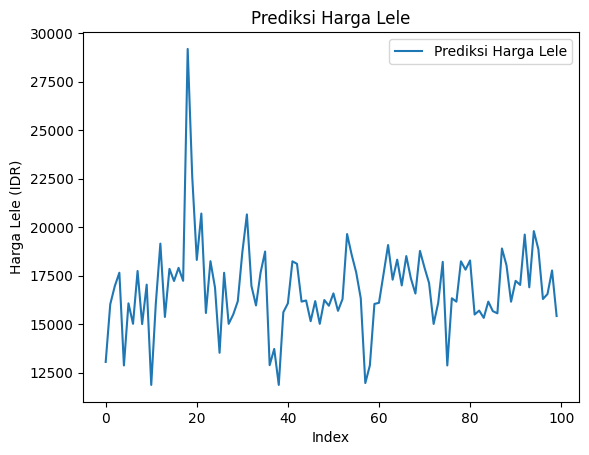

In [30]:
import matplotlib.pyplot as plt

plt.plot(predicted_prices, label='Prediksi Harga Lele')
plt.title('Prediksi Harga Lele')
plt.xlabel('Index')
plt.ylabel('Harga Lele (IDR)')
plt.legend()
plt.show()

In [31]:
# Setelah normalisasi (X_scaled sudah dibuat)
print(np.isnan(X_scaled).any())  # True jika ada NaN, False jika tidak ada

# Membuat DataFrame dari X_scaled
scaled_df = pd.DataFrame(X_scaled, columns=features) # 'features' adalah list nama kolom Anda

# Menampilkan DataFrame
print(scaled_df)

# Atau, untuk menampilkan sebagian data saja:
print(scaled_df.head()) # Menampilkan 5 baris pertama

False
     Volume Produksi  Nilai Produksi  Harga Lele  Kabupaten/Kota_BANDUNG  \
0           0.047371        0.034420    0.228541                     1.0   
1           0.011604        0.007893    0.171406                     0.0   
2           0.017715        0.013679    0.285676                     0.0   
3           0.794082        0.613162    0.285676                     0.0   
4           0.160472        0.094730    0.057135                     0.0   
..               ...             ...         ...                     ...   
495         0.004518        0.003912    0.399946                     0.0   
496         0.002475        0.002326    0.485184                     0.0   
497         0.034521        0.028909    0.367463                     0.0   
498         0.074200        0.060855    0.345907                     0.0   
499         0.101996        0.088036    0.399946                     0.0   

     Kabupaten/Kota_BANDUNG BARAT  Kabupaten/Kota_BANGKALAN  \
0                 

In [32]:
# Menampilkan jumlah nilai kosong di setiap kolom
print(scaled_df.isnull().sum())

# Menampilkan baris-baris yang memiliki nilai kosong
print(scaled_df[scaled_df.isnull().any(axis=1)])

Volume Produksi                 0
Nilai Produksi                  0
Harga Lele                      0
Kabupaten/Kota_BANDUNG          0
Kabupaten/Kota_BANDUNG BARAT    0
                               ..
Kabupaten/Kota_WONOGIRI         0
Kabupaten/Kota_WONOSOBO         0
Provinsi_JAWA BARAT             0
Provinsi_JAWA TENGAH            0
Provinsi_JAWA TIMUR             0
Length: 106, dtype: int64
Empty DataFrame
Columns: [Volume Produksi, Nilai Produksi, Harga Lele, Kabupaten/Kota_BANDUNG, Kabupaten/Kota_BANDUNG BARAT, Kabupaten/Kota_BANGKALAN, Kabupaten/Kota_BANJARNEGARA, Kabupaten/Kota_BANYUMAS, Kabupaten/Kota_BANYUWANGI, Kabupaten/Kota_BATANG, Kabupaten/Kota_BEKASI, Kabupaten/Kota_BLITAR, Kabupaten/Kota_BLORA, Kabupaten/Kota_BOGOR, Kabupaten/Kota_BOJONEGORO, Kabupaten/Kota_BONDOWOSO, Kabupaten/Kota_BOYOLALI, Kabupaten/Kota_BREBES, Kabupaten/Kota_CIAMIS, Kabupaten/Kota_CIANJUR, Kabupaten/Kota_CILACAP, Kabupaten/Kota_CIREBON, Kabupaten/Kota_DEMAK, Kabupaten/Kota_GARUT, Kabupaten/Kota_